In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Part_1_Crime_Data.csv"
df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])


<ipython-input-64-34dc24d2347b>:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])


In [65]:
# Filter relevant columns
columns_of_interest = ['RowID', 'CrimeDateTime', 'CrimeCode', 'Description', 'Neighborhood']
df = df[columns_of_interest]

# Filter data for the years 2017 to 2022
df = df[(df['CrimeDateTime'].dt.year >= 2017) & (df['CrimeDateTime'].dt.year <= 2022)]

# Extract year from CrimeDateTime
df['Year'] = df['CrimeDateTime'].dt.year


In [66]:
# Group data by year and neighborhood, calculate counts
crime_counts = df.groupby(['Year', 'Neighborhood']).size().reset_index(name='Total_Incidents')

# Pivot the table to have years as columns
crime_counts_pivot = crime_counts.pivot(index='Neighborhood', columns='Year', values='Total_Incidents').fillna(0)



In [67]:
# Calculate the difference in counts from 2017 to 2022
print("Table showing the difference of counts from 2017 to 2022:")
crime_counts_pivot['Difference'] = crime_counts_pivot[2022] - crime_counts_pivot[2017]
print(crime_counts_pivot['Difference'])

Table showing the difference of counts from 2017 to 2022:
Neighborhood
ABELL                 1.0
ALLENDALE           -13.0
ARCADIA              -1.0
ARLINGTON             7.0
ARMISTEAD GARDENS   -12.0
                     ... 
WYMAN PARK            0.0
WYNDHURST            -1.0
Woodmere              0.0
YALE HEIGHTS          0.0
YORK-HOMELAND         7.0
Name: Difference, Length: 278, dtype: float64


In [68]:
# Calculate the percentage change
print("\nTable showing the percentage change from 2017 to 2022:")
crime_counts_pivot['PercentageChange'] = (crime_counts_pivot['Difference'] / crime_counts_pivot[2017]) * 100
print(crime_counts_pivot['PercentageChange'])


Table showing the percentage change from 2017 to 2022:
Neighborhood
ABELL                  8.333333
ALLENDALE            -27.083333
ARCADIA              -16.666667
ARLINGTON             12.280702
ARMISTEAD GARDENS    -48.000000
                        ...    
WYMAN PARK                  NaN
WYNDHURST           -100.000000
Woodmere                    NaN
YALE HEIGHTS           0.000000
YORK-HOMELAND               inf
Name: PercentageChange, Length: 278, dtype: float64


In [70]:
# Sort neighborhoods based on the difference
sorted_neighborhoods = crime_counts_pivot.sort_values(by='Difference', ascending=False)
print(sorted_neighborhoods)


Year                    2017   2018   2019   2020   2021   2022  Difference  \
Neighborhood                                                                  
FRANKFORD              121.0  147.0  166.0  169.0  148.0  218.0        97.0   
DOWNTOWN               158.0  207.0  211.0  188.0  201.0  222.0        64.0   
UPTON                  124.0  116.0  147.0   94.0  143.0  174.0        50.0   
EAST BALTIMORE MIDWAY   63.0   68.0  110.0   77.0   86.0   97.0        34.0   
ELLWOOD PARK/MONUMENT   58.0   90.0   67.0   78.0   77.0   89.0        31.0   
...                      ...    ...    ...    ...    ...    ...         ...   
PERKINS HOMES           29.0   28.0   28.0   15.0    3.0    2.0       -27.0   
BROADWAY EAST          115.0  117.0  111.0   91.0  150.0   87.0       -28.0   
SANDTOWN-WINCHESTER    207.0  155.0  147.0  171.0  156.0  168.0       -39.0   
BALTIMORE HIGHLANDS     81.0   63.0   56.0   43.0   76.0   40.0       -41.0   
BROOKLYN               226.0  137.0  163.0  139.0  1

In [71]:
# Select top 5 and bottom 5 neighborhoods
top_5_neighborhoods = sorted_neighborhoods.head(5)
bottom_5_neighborhoods = sorted_neighborhoods.tail(5)

# Display summary tables
print("Top 5 Neighborhoods with Highest Increase:")
print(top_5_neighborhoods[['Difference', 'PercentageChange']])

print("\nTop 5 Neighborhoods with Highest Decrease:")
print(bottom_5_neighborhoods[['Difference', 'PercentageChange']])

Top 5 Neighborhoods with Highest Increase:
Year                   Difference  PercentageChange
Neighborhood                                       
FRANKFORD                    97.0         80.165289
DOWNTOWN                     64.0         40.506329
UPTON                        50.0         40.322581
EAST BALTIMORE MIDWAY        34.0         53.968254
ELLWOOD PARK/MONUMENT        31.0         53.448276

Top 5 Neighborhoods with Highest Decrease:
Year                 Difference  PercentageChange
Neighborhood                                     
PERKINS HOMES             -27.0        -93.103448
BROADWAY EAST             -28.0        -24.347826
SANDTOWN-WINCHESTER       -39.0        -18.840580
BALTIMORE HIGHLANDS       -41.0        -50.617284
BROOKLYN                  -49.0        -21.681416


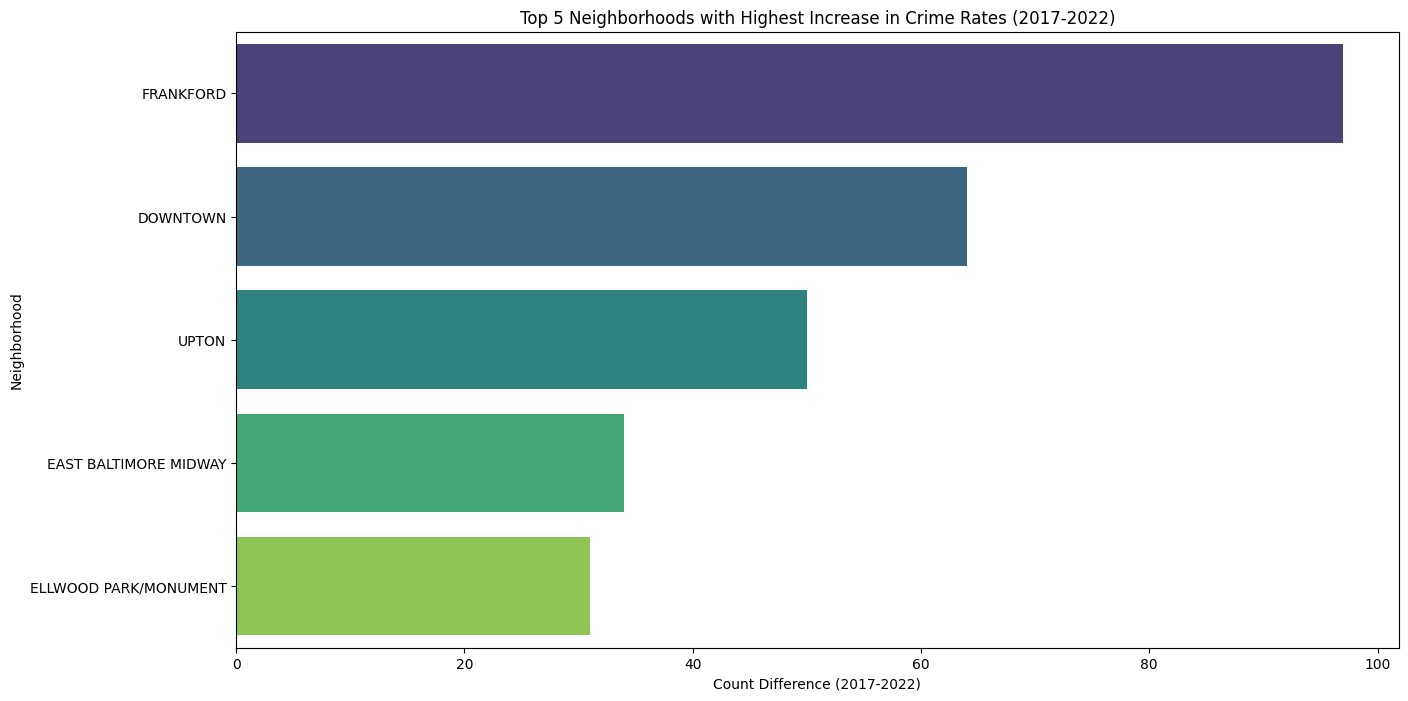

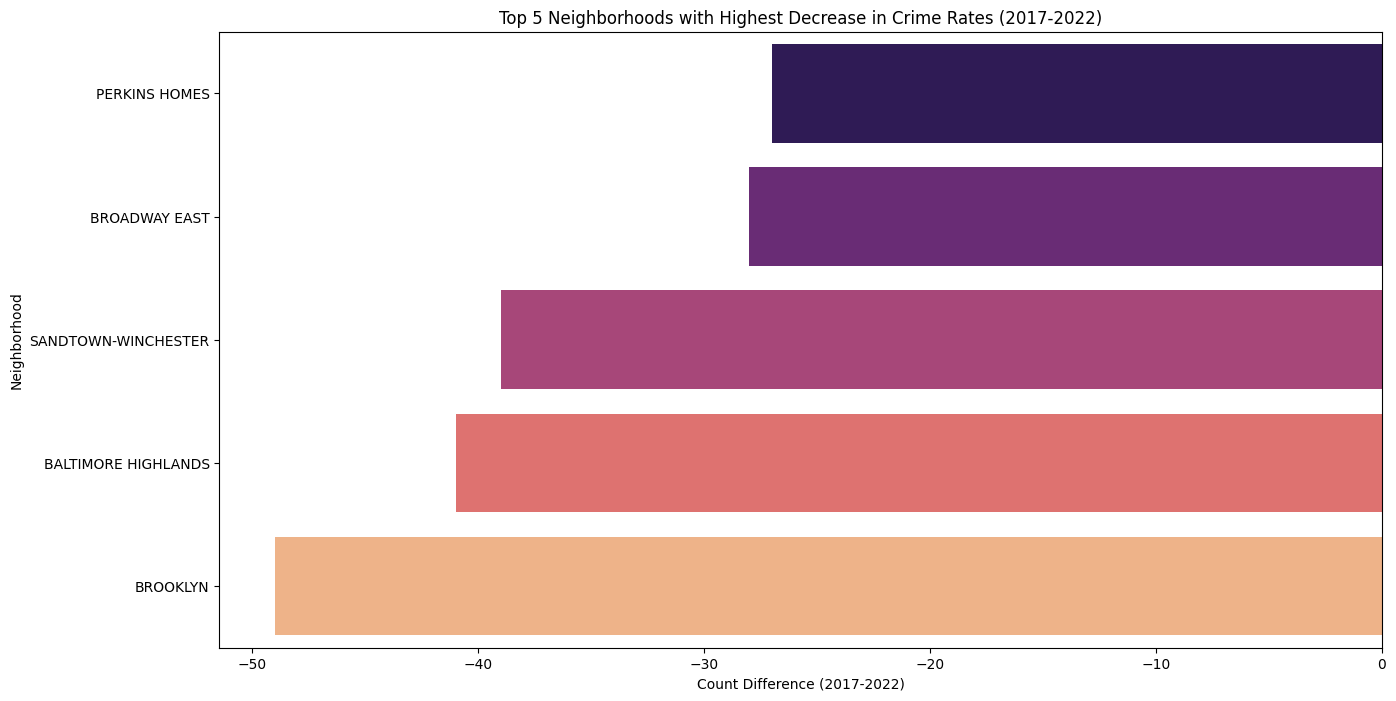

In [36]:
# Create visualizations
plt.figure(figsize=(15, 8))
sns.barplot(x='Difference', y=top_5_neighborhoods.index, data=top_5_neighborhoods, palette='viridis')
plt.title('Top 5 Neighborhoods with Highest Increase in Crime Rates (2017-2022)')
plt.xlabel('Count Difference (2017-2022)')
plt.ylabel('Neighborhood')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x='Difference', y=bottom_5_neighborhoods.index, data=bottom_5_neighborhoods, palette='magma')
plt.title('Top 5 Neighborhoods with Highest Decrease in Crime Rates (2017-2022)')
plt.xlabel('Count Difference (2017-2022)')
plt.ylabel('Neighborhood')
plt.show()

In [75]:
# Display the table
print("Table showing the count of crimes and how those numbers have varied each year:")
print(crime_counts_pivot)

Table showing the count of crimes and how those numbers have varied each year:
Year               2017  2018  2019  2020  2021  2022  Difference  \
Neighborhood                                                        
ABELL              12.0  13.0  10.0   7.0   8.0  13.0         1.0   
ALLENDALE          48.0  56.0  48.0  24.0  48.0  35.0       -13.0   
ARCADIA             6.0   9.0   7.0  10.0   6.0   5.0        -1.0   
ARLINGTON          57.0  38.0  38.0  35.0  44.0  64.0         7.0   
ARMISTEAD GARDENS  25.0  18.0  14.0  22.0  24.0  13.0       -12.0   
...                 ...   ...   ...   ...   ...   ...         ...   
WYMAN PARK          0.0   1.0   1.0   2.0   2.0   0.0         0.0   
WYNDHURST           1.0   1.0   0.0   0.0   1.0   0.0        -1.0   
Woodmere            0.0   0.0   0.0   0.0   1.0   0.0         0.0   
YALE HEIGHTS       16.0  13.0  17.0  29.0  14.0  16.0         0.0   
YORK-HOMELAND       0.0   3.0   3.0   3.0   6.0   7.0         7.0   

Year               Perc

In [38]:
# Create a list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Filter the original DataFrame based on selected neighborhoods
selected_neighborhood_data = df[df['Neighborhood'].isin(selected_neighborhoods)]


In [76]:
# Group data by year, neighborhood, and count incidents
selected_neighborhood_counts = selected_neighborhood_data.groupby(['Year', 'Neighborhood']).size().reset_index(name='Total_Incidents')

# Pivot the table to have years as columns
selected_neighborhood_counts_pivot = selected_neighborhood_counts.pivot(index='Neighborhood', columns='Year', values='Total_Incidents').fillna(0)

# Calculate the difference in counts from 2017 to 2022
selected_neighborhood_counts_pivot['Difference'] = selected_neighborhood_counts_pivot[2022] - selected_neighborhood_counts_pivot[2017]

# Display the table
print("\nTable showing the count of crimes and how those numbers have varied each year for selected neighborhoods:")
print(selected_neighborhood_counts_pivot)




Table showing the count of crimes and how those numbers have varied each year for selected neighborhoods:
Year                 2017  2018  2019  2020  2021  2022  Difference
Neighborhood                                                       
BALTIMORE HIGHLANDS    81    63    56    43    76    40         -41
BROADWAY EAST         115   117   111    91   150    87         -28
BROOKLYN              226   137   163   139   128   177         -49
PERKINS HOMES          29    28    28    15     3     2         -27
SANDTOWN-WINCHESTER   207   155   147   171   156   168         -39


In [12]:
# Display the selected neighborhood data
print("\nSelected neighborhood data:")
print(selected_neighborhood_data)



Selected neighborhood data:
        RowID             CrimeDateTime CrimeCode   Description  \
6          16 2019-10-24 11:22:00+00:00        4C  AGG. ASSAULT   
41        690 2018-12-24 01:50:00+00:00        4C  AGG. ASSAULT   
42        694 2018-12-24 20:14:00+00:00        4B  AGG. ASSAULT   
45        780 2018-12-24 18:18:00+00:00        4A  AGG. ASSAULT   
54        994 2018-07-21 19:20:00+00:00        1A      HOMICIDE   
...       ...                       ...       ...           ...   
46000  589530 2017-06-18 08:30:00+00:00        4C  AGG. ASSAULT   
46002  589574 2017-06-06 17:17:00+00:00        4C  AGG. ASSAULT   
46004  589683 2017-06-05 15:27:00+00:00        9S      SHOOTING   
46011  589716 2017-04-12 09:50:00+00:00        4A  AGG. ASSAULT   
46017  589768 2017-04-21 02:35:00+00:00        4C  AGG. ASSAULT   

                Neighborhood  Year  
6      EAST BALTIMORE MIDWAY  2019  
41                 FRANKFORD  2018  
42                 FRANKFORD  2018  
45       SANDTOWN-

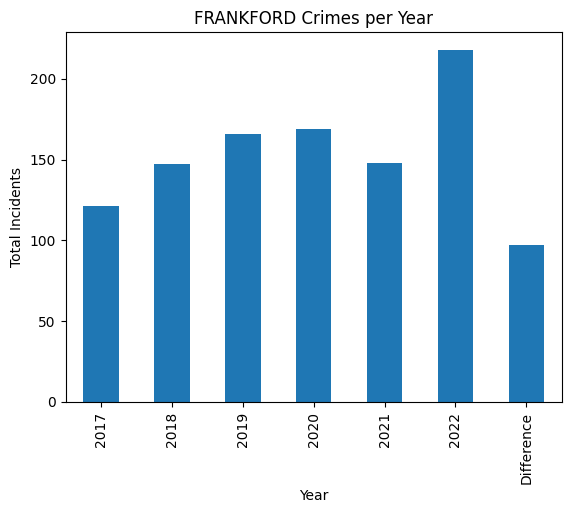

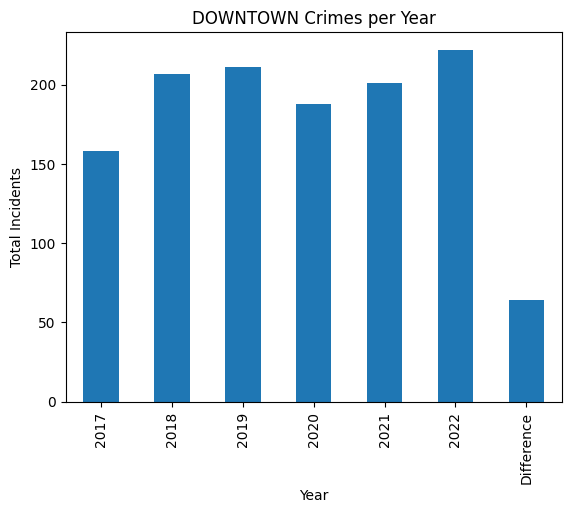

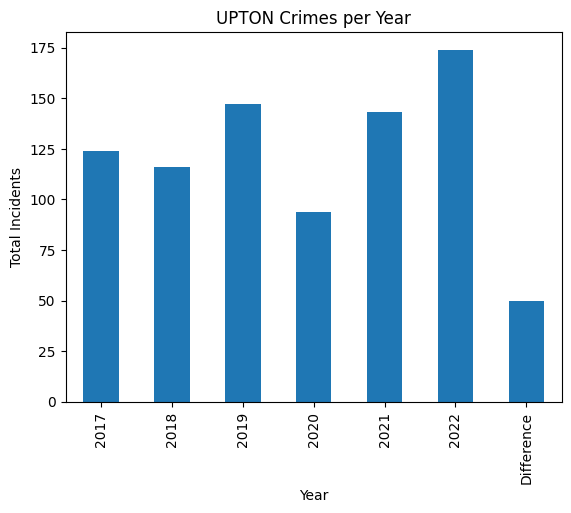

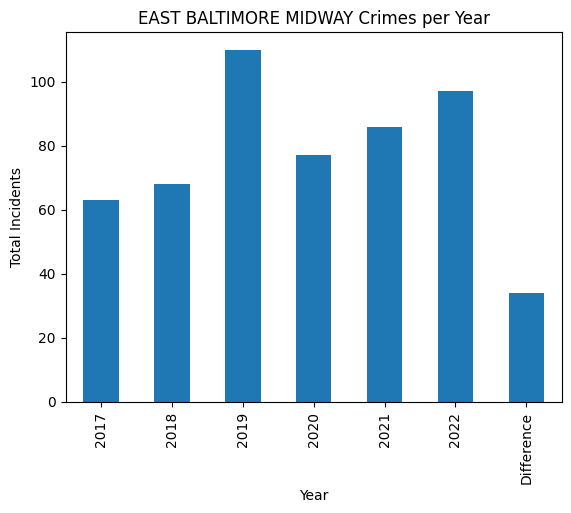

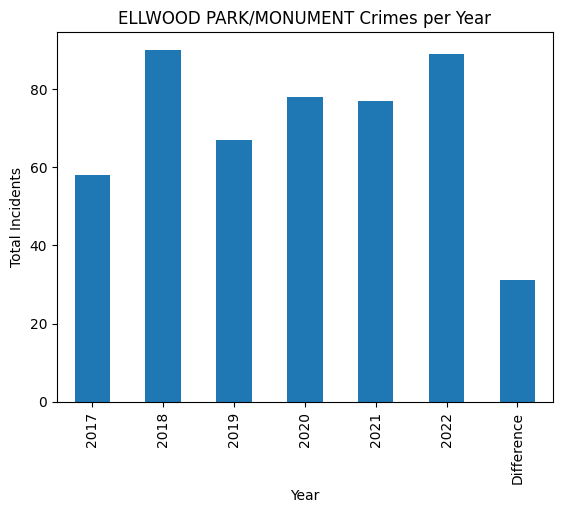

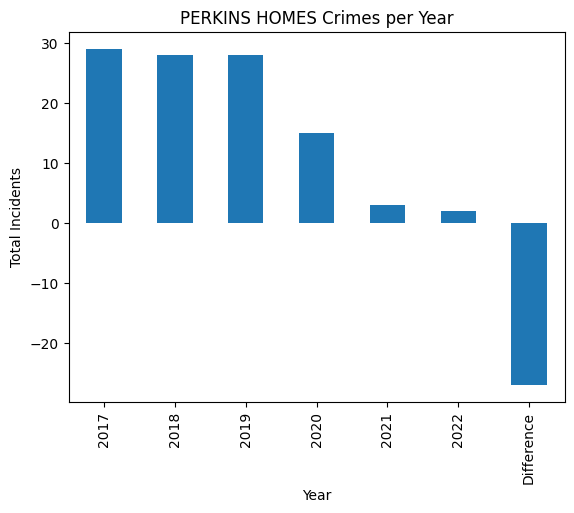

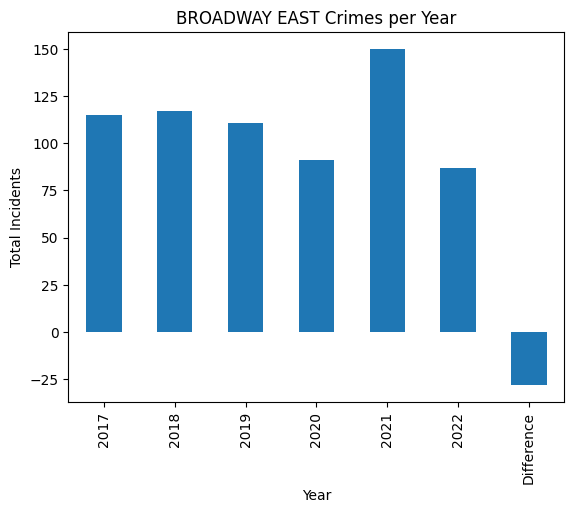

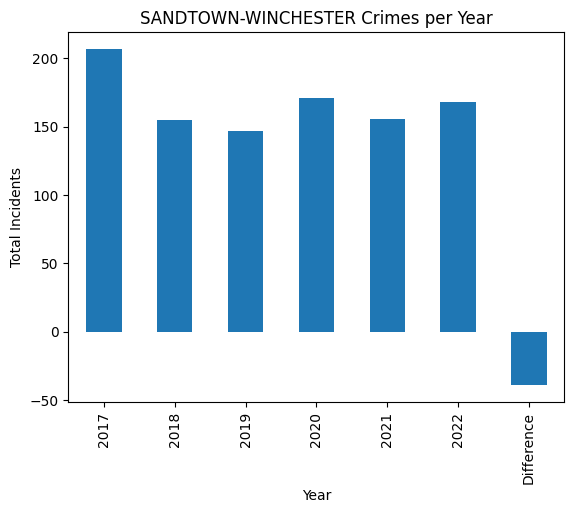

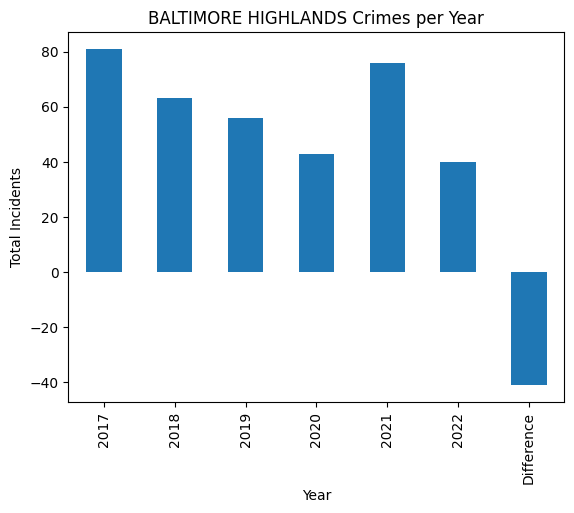

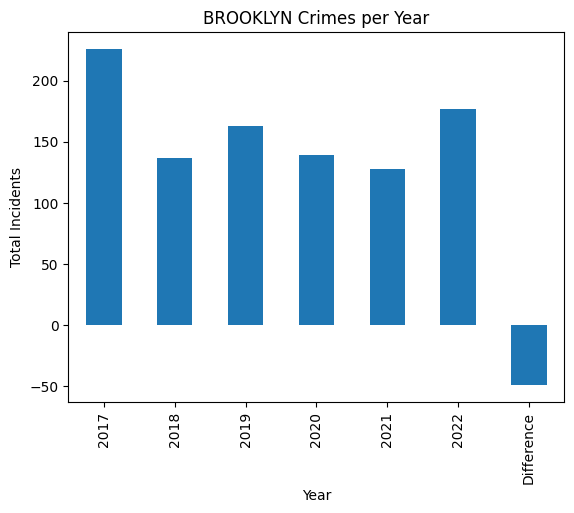

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Create dataframe with counts for each year per neighborhood
counts_df = selected_neighborhood_counts_pivot

# Plot charts
for neighborhood in selected_neighborhoods:

    # Extract data
    data = counts_df.loc[neighborhood]

    # Plot bar chart
    data.plot(kind='bar')

    # Customize chart
    plt.title(f'{neighborhood} Crimes per Year')
    plt.xlabel('Year')
    plt.ylabel('Total Incidents')
    plt.show()


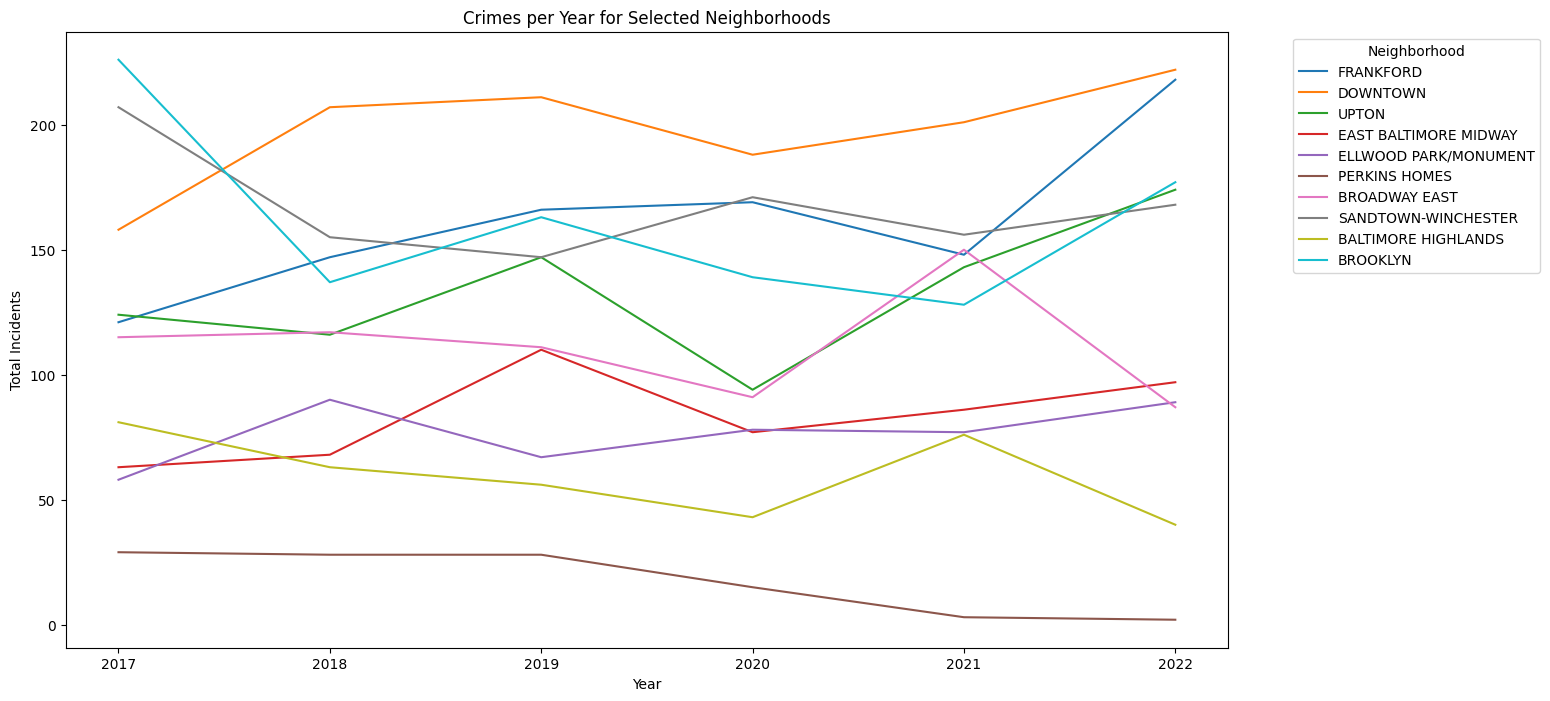

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Create list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Create dataframe with counts for each year per neighborhood
counts_df = selected_neighborhood_counts_pivot

# Plot charts
plt.figure(figsize=(15, 8))

for neighborhood in selected_neighborhoods:
    # Extract data, excluding the 'Difference' column
    data = counts_df.loc[neighborhood].drop('Difference', errors='ignore')

    # Plot line chart for each neighborhood on the same plot
    plt.plot(data.index, data, label=neighborhood)

# Customize chart
plt.title('Crimes per Year for Selected Neighborhoods')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

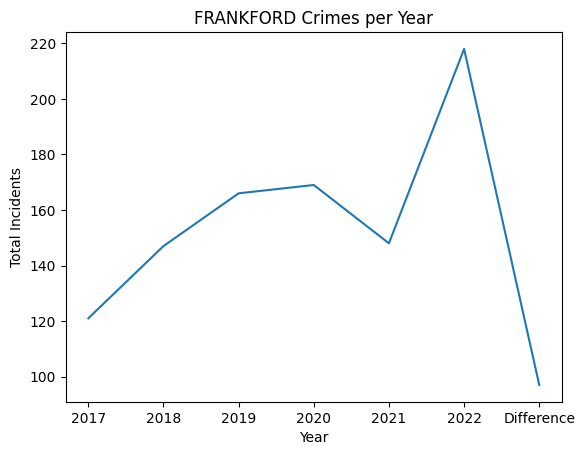

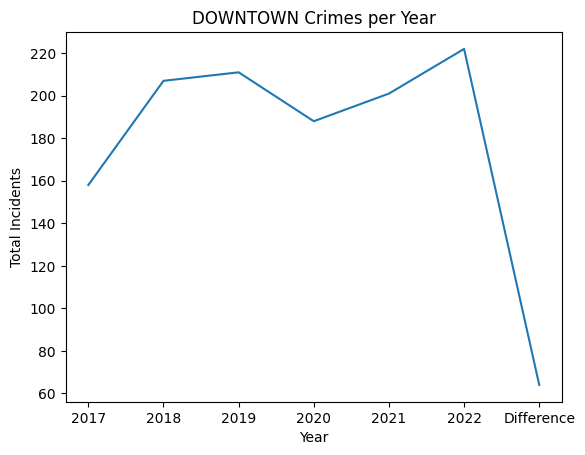

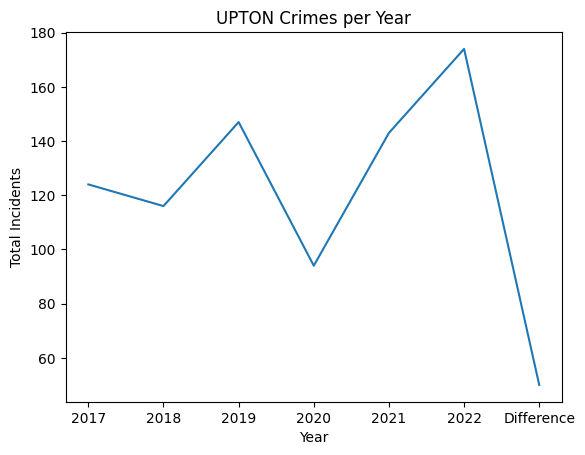

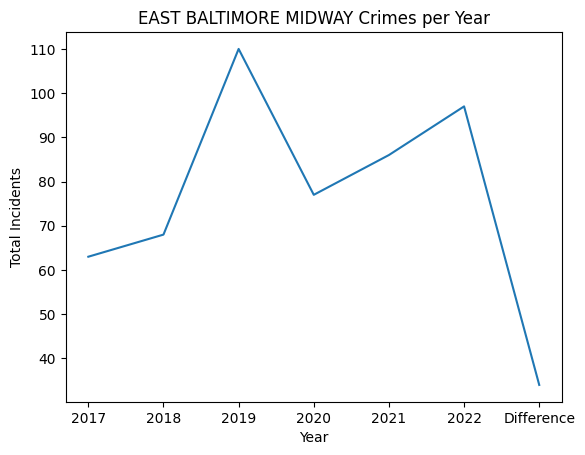

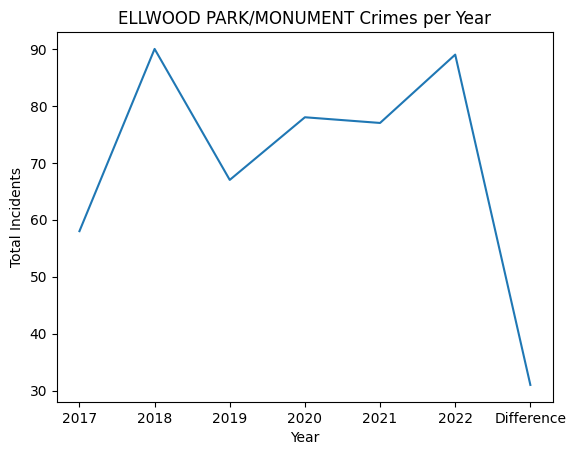

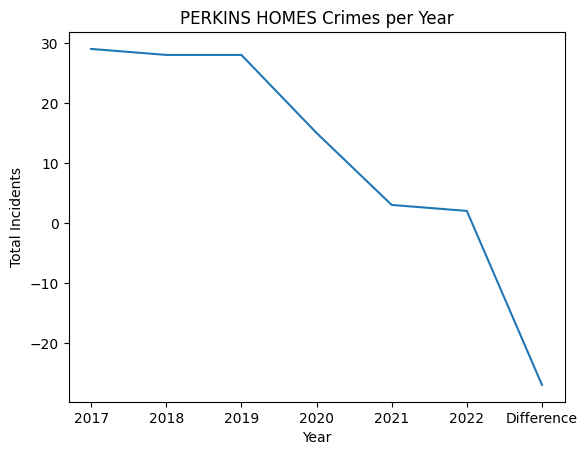

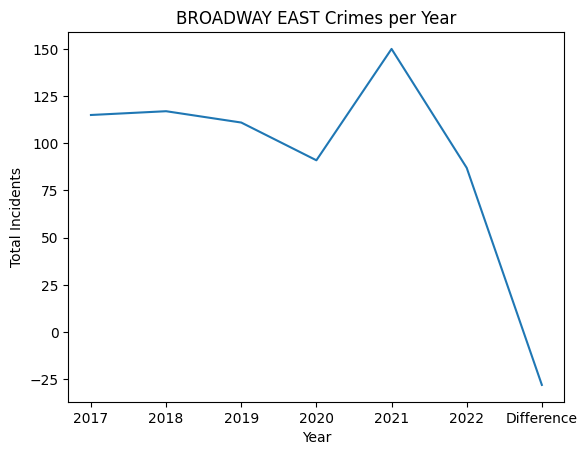

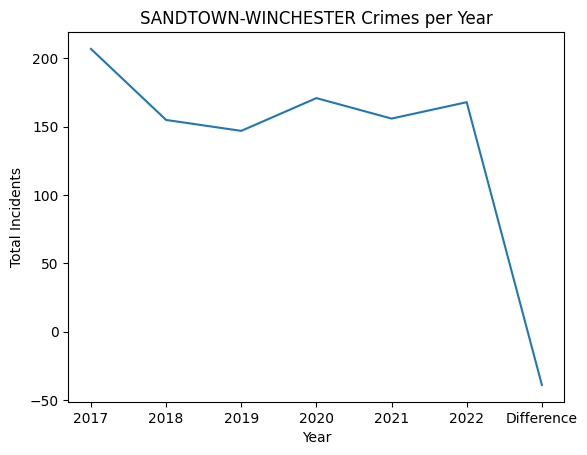

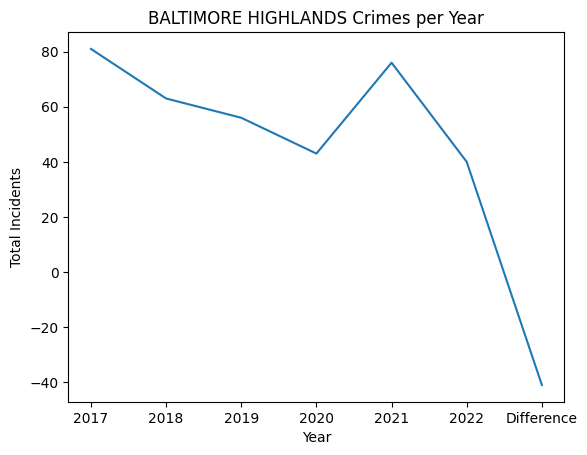

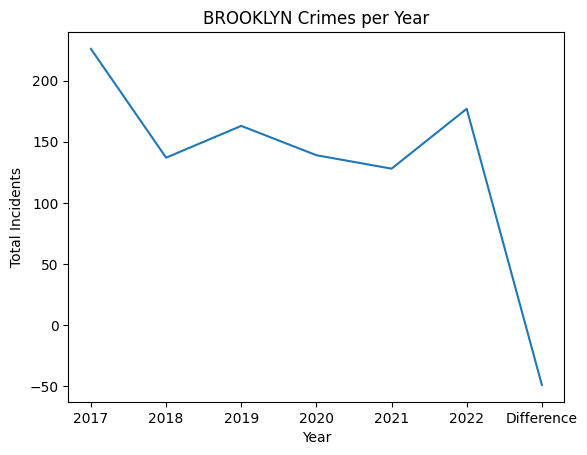

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Create dataframe with counts for each year per neighborhood
counts_df = selected_neighborhood_counts_pivot

# Plot charts
for neighborhood in selected_neighborhoods:

    # Extract data
    data = counts_df.loc[neighborhood]

    # Plot line chart
    data.plot(kind='line')

    # Customize chart
    plt.title(f'{neighborhood} Crimes per Year')
    plt.xlabel('Year')
    plt.ylabel('Total Incidents')
    plt.show()


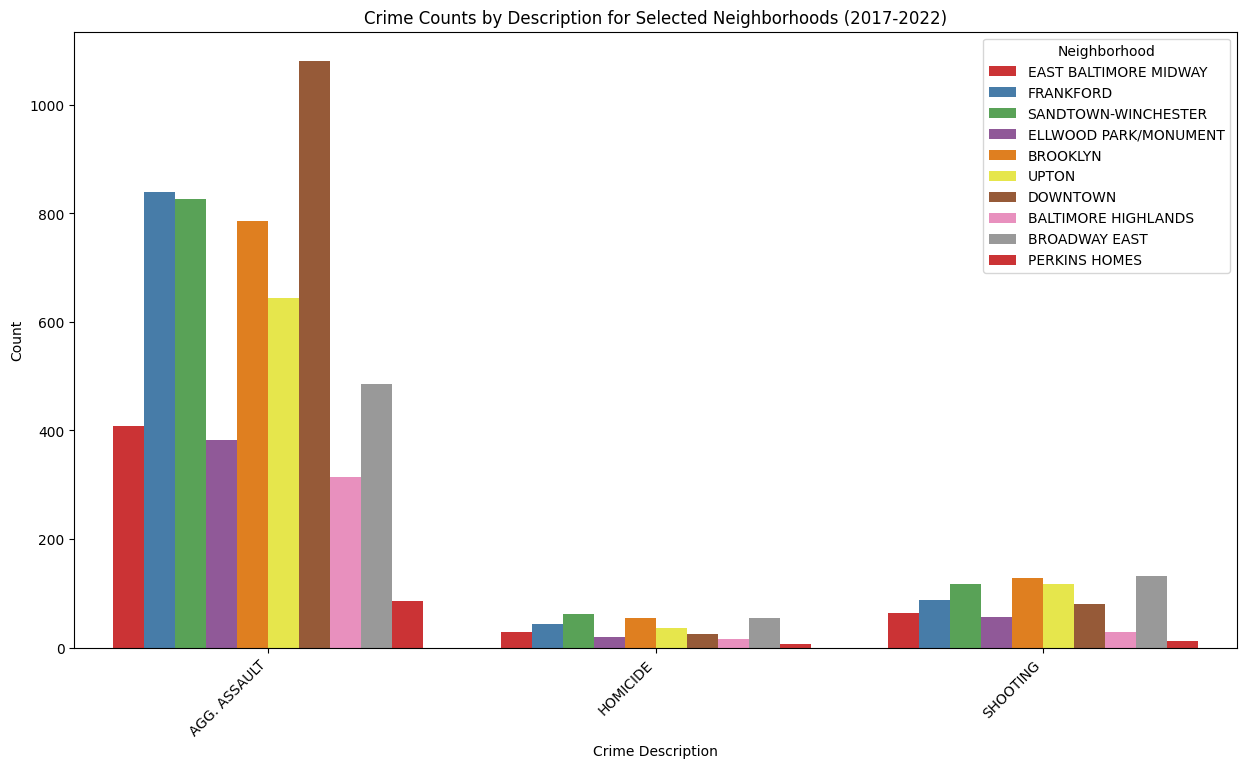

In [18]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Description', hue='Neighborhood', data=selected_neighborhood_data, palette='Set1')
plt.title('Crime Counts by Description for Selected Neighborhoods (2017-2022)')
plt.xlabel('Crime Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Neighborhood')
plt.show()


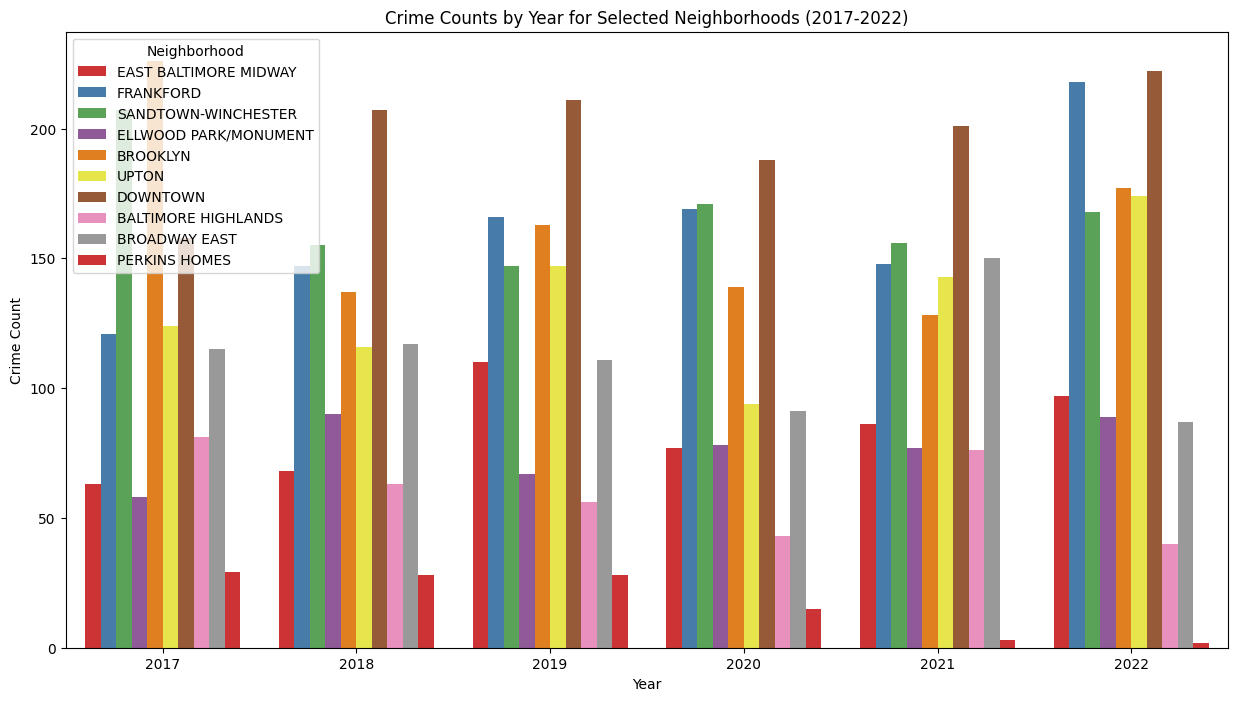

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Year', hue='Neighborhood', data=selected_neighborhood_data, palette='Set1')
plt.title('Crime Counts by Year for Selected Neighborhoods (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

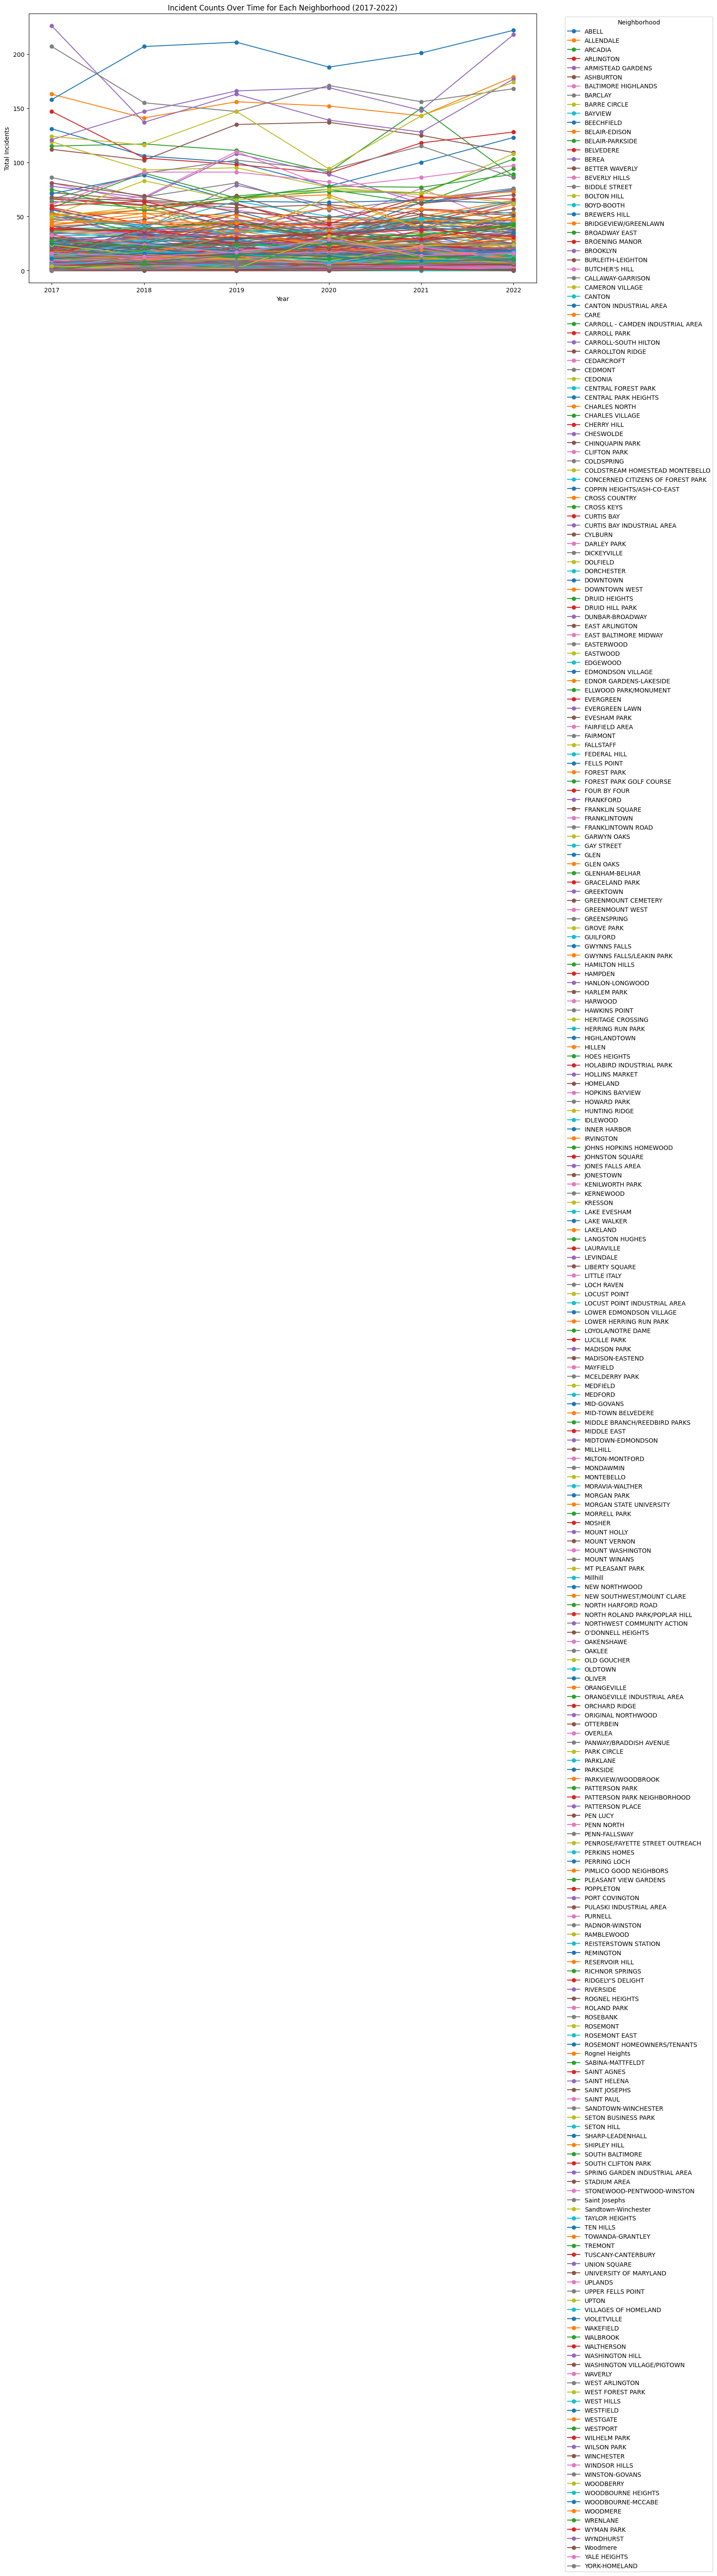

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and processed your data
# using the code provided in the previous responses

# Group data by year, neighborhood, and count incidents
neighborhood_counts = df.groupby(['Year', 'Neighborhood']).size().reset_index(name='Total_Incidents')

# Pivot the table to have years as columns
neighborhood_counts_pivot = neighborhood_counts.pivot(index='Neighborhood', columns='Year', values='Total_Incidents').fillna(0)

# Create a line plot for each neighborhood
plt.figure(figsize=(15, 8))
for neighborhood in neighborhood_counts_pivot.index:
    plt.plot(neighborhood_counts_pivot.columns, neighborhood_counts_pivot.loc[neighborhood], label=neighborhood, marker='o')

plt.title('Incident Counts Over Time for Each Neighborhood (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
file_path = "/content/drive/MyDrive/Colab Notebooks/Part_1_Crime_Data.csv"
df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])



<ipython-input-88-ce5d8eb0fbd7>:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])


In [89]:
# Filter relevant columns
columns_of_interest = ['RowID', 'CCNumber', 'CrimeDateTime', 'CrimeCode', 'Description', 'Inside_Outside',
                        'Weapon', 'Post', 'Gender', 'Age', 'Race', 'Ethnicity', 'Location', 'Old_District',
                        'New_District', 'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'PremiseType']

df = df[columns_of_interest]

# Filter data for the years 2017 to 2022
df = df[(df['CrimeDateTime'].dt.year >= 2017) & (df['CrimeDateTime'].dt.year <= 2022)]

# Extract year from CrimeDateTime
df['Year'] = df['CrimeDateTime'].dt.year

# Group data by year and calculate citywide counts
citywide_counts = df.groupby('Year').size().reset_index(name='City_Total_Incidents')

In [90]:
# Calculate differences
citywide_counts['Difference'] = citywide_counts['City_Total_Incidents'].diff().fillna(0)
print(citywide_counts)

   Year  City_Total_Incidents  Difference
0  2017                  6809         0.0
1  2018                  6532      -277.0
2  2019                  6745       213.0
3  2020                  6314      -431.0
4  2021                  6683       369.0
5  2022                  7138       455.0


In [91]:
# Calculate percentage change
citywide_counts['PercentageChange'] = (citywide_counts['Difference'] /
                                citywide_counts['City_Total_Incidents'].shift(1)) * 100
print(citywide_counts['PercentageChange'])

0         NaN
1   -4.068145
2    3.260870
3   -6.389918
4    5.844156
5    6.808320
Name: PercentageChange, dtype: float64


In [92]:
print("Citywide Analysis:")
print(citywide_counts[['Difference', 'PercentageChange',]])

Citywide Analysis:
   Difference  PercentageChange
0         0.0               NaN
1      -277.0         -4.068145
2       213.0          3.260870
3      -431.0         -6.389918
4       369.0          5.844156
5       455.0          6.808320


In [95]:
# Sort neighborhoods based on the difference
sorted_neighborhoods = citywide_counts.sort_values(by='Difference', ascending=False)

# Select top 5 and bottom 5 neighborhoods
top_5_neighborhoods = sorted_neighborhoods.head(5)
bottom_5_neighborhoods = sorted_neighborhoods.tail(5)

# Display summary tables for top and bottom neighborhoods
print("Top 5 Neighborhoods with Highest Increase:")
print(top_5_neighborhoods[['Year', 'City_Total_Incidents', 'Difference', 'PercentageChange']])

print("\nTop 5 Neighborhoods with Highest Decrease:")
print(bottom_5_neighborhoods[['Year', 'City_Total_Incidents', 'Difference', 'PercentageChange']])



Top 5 Neighborhoods with Highest Increase:
   Year  City_Total_Incidents  Difference  PercentageChange
5  2022                  7138       455.0          6.808320
4  2021                  6683       369.0          5.844156
2  2019                  6745       213.0          3.260870
0  2017                  6809         0.0               NaN
1  2018                  6532      -277.0         -4.068145

Top 5 Neighborhoods with Highest Decrease:
   Year  City_Total_Incidents  Difference  PercentageChange
4  2021                  6683       369.0          5.844156
2  2019                  6745       213.0          3.260870
0  2017                  6809         0.0               NaN
1  2018                  6532      -277.0         -4.068145
3  2020                  6314      -431.0         -6.389918


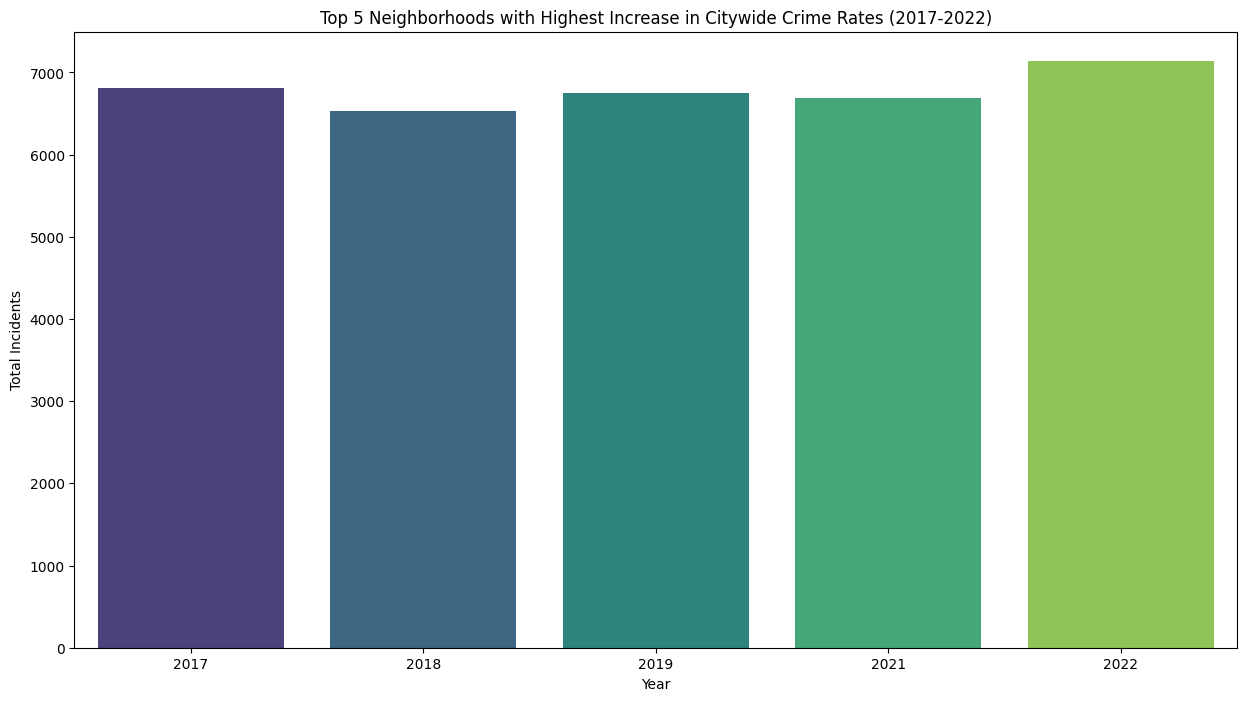

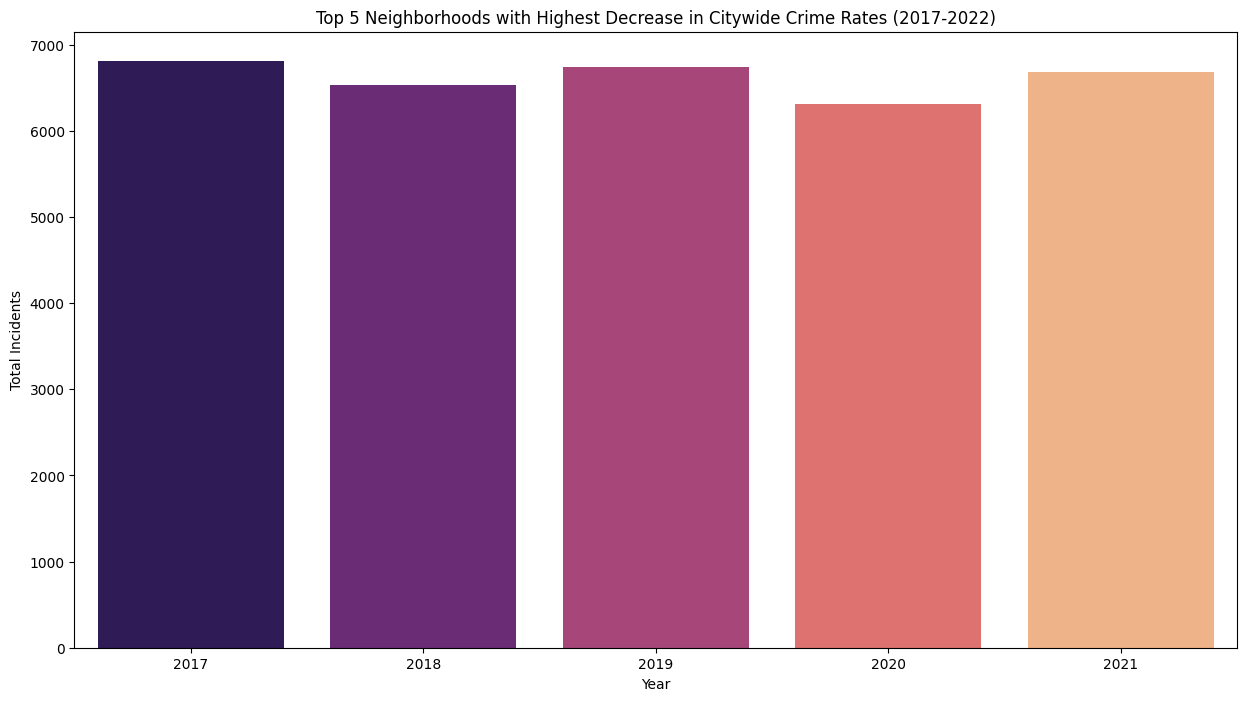

In [96]:
# Create visualizations for top and bottom neighborhoods
plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='City_Total_Incidents', data=top_5_neighborhoods, palette='viridis')
plt.title('Top 5 Neighborhoods with Highest Increase in Citywide Crime Rates (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='City_Total_Incidents', data=bottom_5_neighborhoods, palette='magma')
plt.title('Top 5 Neighborhoods with Highest Decrease in Citywide Crime Rates (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()

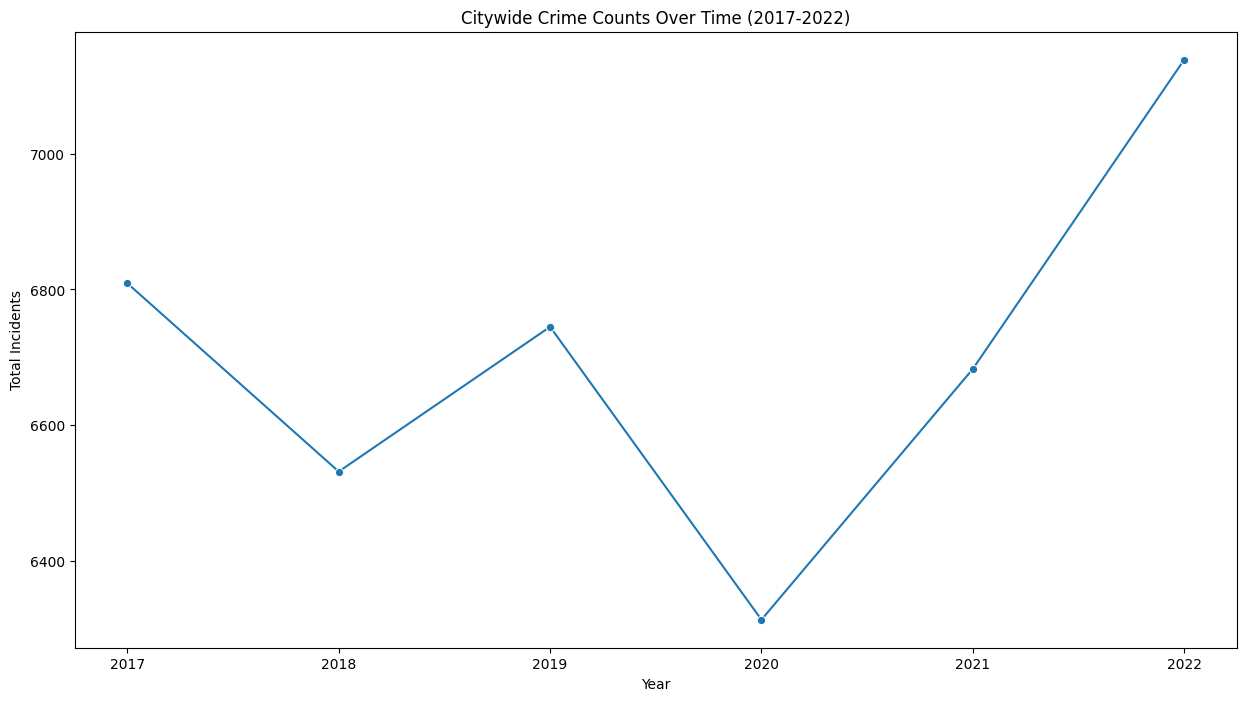

In [94]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()
